In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
# Loading clean listing dataset
file_path = "Resources/listings_data_cleaned.csv"
df = pd.read_csv(file_path)
df.head()

,id,host_id,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,zip
0,2539,2787,9.0,Kensington,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,$299.00,30,21,9,4.89,11218
1,5121,7356,2.0,Bedford-Stuyvesant,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,$60.00,30,5,50,4.52,11216
2,45910,204539,7.0,Ridgewood,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,$425.00,30,30,13,4.42,11385
3,5136,7378,1.0,Sunset Park,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,2.0,$275.00,21,0,3,5.00,11215
4,77765,417504,30.0,Greenpoint,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,$308.00,2,15,42,4.90,11109


In [5]:
# Convert "price" from object to int
df["Price"] = df["price"].str.replace('[\$\,]', '', regex=True)
df["Price"]= pd.to_numeric(df["Price"])
df["Price"]

0        299.0
1         60.0
2        425.0
3        275.0
4        308.0
         ...  
28005    125.0
28006    150.0
28007    157.0
28008    108.0
28009    140.0
Name: Price, Length: 28010, dtype: float64

In [6]:
df.head()

,id,host_id,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,zip,Price
0,2539,2787,9.0,Kensington,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,$299.00,30,21,9,4.89,11218,299.0
1,5121,7356,2.0,Bedford-Stuyvesant,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,$60.00,30,5,50,4.52,11216,60.0
2,45910,204539,7.0,Ridgewood,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,$425.00,30,30,13,4.42,11385,425.0
3,5136,7378,1.0,Sunset Park,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,2.0,$275.00,21,0,3,5.00,11215,275.0
4,77765,417504,30.0,Greenpoint,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,$308.00,2,15,42,4.90,11109,308.0


In [7]:
# Remove the price Column
df.drop(columns=["price"], inplace=True)

In [48]:
result=df.dtypes
result

id                          int64
host_id                     int64
host_listings_count       float64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bedrooms                  float64
beds                      float64
minimum_nights              int64
availability_30             int64
number_of_reviews           int64
review_scores_rating      float64
zip                         int64
Price                     float64
dtype: object

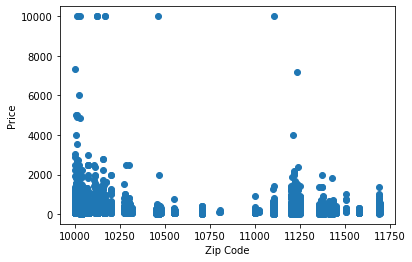

In [16]:
# Relationship between zip code and price
plt.scatter(df.zip, df.Price)
plt.xlabel('Zip Code')
plt.ylabel('Price')
plt.show()

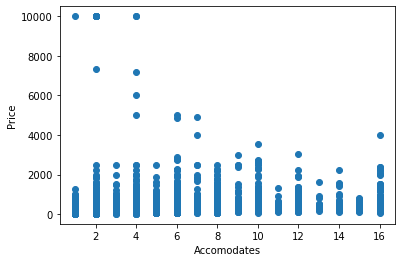

In [25]:
# Relationship between accomodates and Price
plt.scatter(df.accommodates, df.Price)
plt.xlabel('Accomodates')
plt.ylabel('Price')
plt.show()

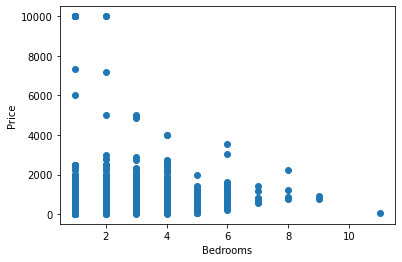

In [17]:
# Relationship between bedrooms and Price
plt.scatter(df.bedrooms, df.Price)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

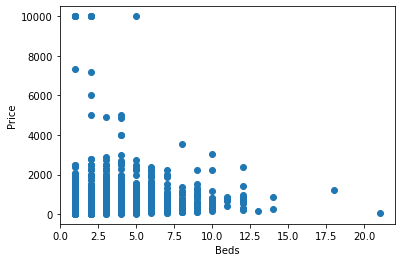

In [26]:
# Relationship between beds and Price
plt.scatter(df.beds, df.Price)
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

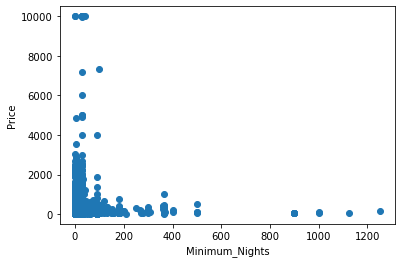

In [19]:
# Relationship between minimum_nights and Price
plt.scatter(df.minimum_nights, df.Price)
plt.xlabel('Minimum_Nights')
plt.ylabel('Price')
plt.show()

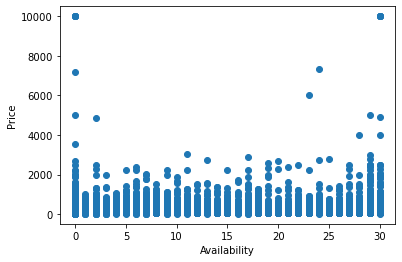

In [27]:
# Relationship between availability and Price
plt.scatter(df.availability_30, df.Price)
plt.xlabel("Availability")
plt.ylabel("Price")
plt.show()

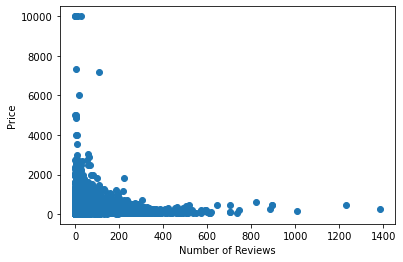

In [29]:
# Relationship between number of reviews and Price
plt.scatter(df.number_of_reviews, df.Price)
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

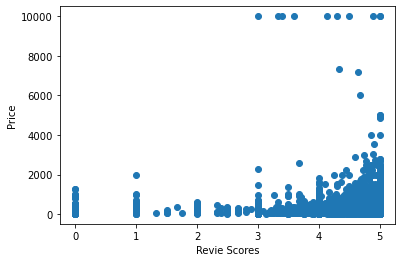

In [30]:
# Relationship between review_scores_rating and price
plt.scatter(df.review_scores_rating, df.Price)
plt.xlabel('Review Scores')
plt.ylabel('Price')
plt.show()

In [34]:
# Reshape the data
X_Nights = df.minimum_nights.values.reshape(-1, 1)

In [35]:
X_Nights[:5]

array([[30],
       [30],
       [30],
       [21],
       [ 2]])

In [36]:
X_Nights.shape

(28010, 1)

In [37]:
y= df.Price

In [38]:
model = LinearRegression()

In [39]:
# Fitting and training the model
model.fit(X_Nights, y)

LinearRegression()

In [40]:
y_pred = model.predict(X_Nights)
print(y_pred.shape)

(28010,)


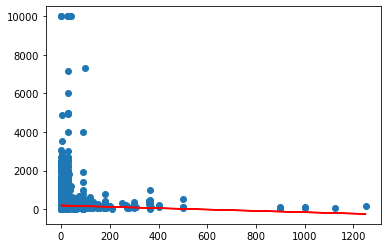

In [41]:
plt.scatter(X_Nights, y)
plt.plot(X_Nights, y_pred, color='red')
plt.show()

In [42]:
print(model.coef_)
print(model.intercept_)

[-0.35027054]
189.35935690994552


In [8]:
target = ["Price"]

In [9]:
df.head()

,id,host_id,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,review_scores_rating,zip,Price
0,2539,2787,9.0,Kensington,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,30,21,9,4.89,11218,299.0
1,5121,7356,2.0,Bedford-Stuyvesant,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,30,5,50,4.52,11216,60.0
2,45910,204539,7.0,Ridgewood,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,30,30,13,4.42,11385,425.0
3,5136,7378,1.0,Sunset Park,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,2.0,21,0,3,5.00,11215,275.0
4,77765,417504,30.0,Greenpoint,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,2,15,42,4.90,11109,308.0


In [10]:
# Create a linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[["zip", "bedrooms", "minimum_nights", "review_scores_rating"]],df.Price)

LinearRegression()

In [11]:
#Look at the coefficient
reg.coef_

array([-8.34759170e-02,  1.21802016e+02, -3.21787160e-01,  1.01094996e+01])

In [12]:
#Look at the intercept
reg.intercept_

872.8158544395167

### Find price with a home of 11210 zip, 3.0 bedroomes, 4 minimum nights and 3.90 of review_scores_rating

In [13]:
reg.predict([[11210,3.0,4,3.90]])

array([340.59677271])